# Pillar 5 - Miscellaneous

Pillar 5 is for miscellaneous indicators. This includes:
- vacancy data: total, ratio etc.
- House price data

In [16]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/acannon/Dropbox')
import seaborn as sns
sns.set_theme()
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 

In [17]:
file_path = 'diss_data/clean_hp.xlsx'
df_hp = pd.read_excel(file_path)

# the differences start in column 118 (so 119 in python)
# the indicators start in column 233 (so 234 in python)

pdummy = df_hp.filter(regex = "Ip$")

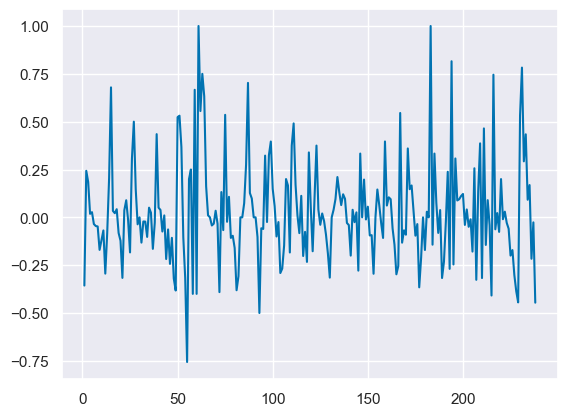

In [25]:
pdummy.head()

diff_index = pdummy.mean(axis = 1)

pct_diff = diff_index.pct_change()

plt.plot(pct_diff)

<AxesSubplot:>

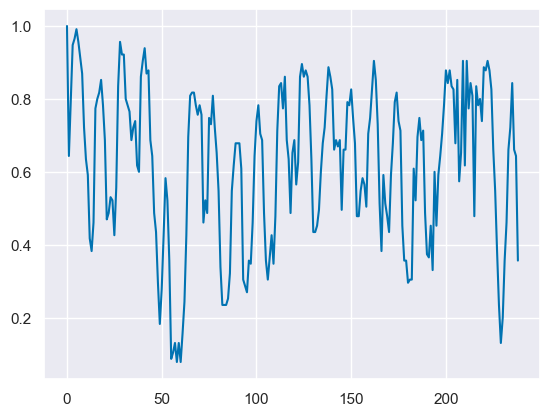

In [19]:
type(diff_index)
diff_index.plot.line(x = df_hp['period'])

In [20]:
df_indicators = pd.read_excel('diss_data/more.xlsx')

In [21]:
df_indicators.head()

,Date,period,land_sales_volume,all_vacancies,vacancy_ratio,new_cars,Y10,m7,month,spread,crude,crude_volume,period1,month2,car,land
0,01/31/04,2004-01,NaN,2.30,2.4,,,NaN,NaN,NaN,NaN,NaN,2004-01,NaN,,NaN
1,02/29/04,2004-02,NaN,2.30,2.3,91.45999999999999,,NaN,NaN,NaN,NaN,NaN,2004-02,NaN,91.45999999999999,NaN
2,03/31/04,2004-03,NaN,2.30,2.3,466.96,4.72,NaN,NaN,NaN,31.51,933112,2004-03,NaN,466.96,NaN
3,04/30/04,2004-04,NaN,2.30,2.3,187,4.96,NaN,NaN,NaN,34.48,933233,2004-04,NaN,187,NaN
4,05/31/04,2004-05,NaN,2.40,2.3,194.48,5.11,4.26,4.26,0.85,36.58,918837,2004-05,4.26,194.48,NaN


In [22]:
p5 = pd.DataFrame()
p5['vacancy'] = df_indicators[['all_vacancies']]
p5['vac_diff'] = p5['vacancy'].diff()
p5['period'] = df_indicators['period']

In [23]:
scaler = StandardScaler()
std_p5 = pd.DataFrame(scaler.fit_transform(p5),columns = list(p5))

ValueError: could not convert string to float: '2004-01'

In [ ]:
#sns.kdeplot(std_p5['vac_diff'])
std_p5.head()

In [ ]:
plt.plot(std_p5['vac_diff'])

In [ ]:
p5.head()